In [37]:
#!pip install -Uqq fastbook
#import fastbook
#fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', '9cb46a0ddcfd4cc896554ae4187662de')

In [40]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128)>

In [46]:
results = search_images_bing(key, 'chihuahua dog')
ims = results.attrgot('content_url')
len(ims) # why is this 150?

150

In [52]:
dest = 'fastbook/images/chihuahua.jpg'
download_url(ims[0], dest)

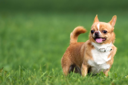

In [53]:
im = Image.open(dest)
im.to_thumb(128,128)

In [5]:
pic_types = 'chihuahua','muffin'
path = Path('fastbook/images/blueberry')

In [56]:
if not path.exists():
    path.mkdir()

In [57]:
dest = (path/'chihuahua')
dest.mkdir(exist_ok=True)
results = search_images_bing(key, 'chihuahua dog')
download_images(dest, urls=results.attrgot('content_url'))

In [58]:
dest = (path/'muffin')
dest.mkdir(exist_ok=True)
results = search_images_bing(key, 'blueberry muffin')
download_images(dest, urls=results.attrgot('content_url'))

In [7]:
fns = get_image_files(path)
fns

(#294) [Path('fastbook/images/blueberry/chihuahua/00000000.jpg'),Path('fastbook/images/blueberry/chihuahua/00000001.jpg'),Path('fastbook/images/blueberry/chihuahua/00000002.jpg'),Path('fastbook/images/blueberry/chihuahua/00000003.jpg'),Path('fastbook/images/blueberry/chihuahua/00000004.jpg'),Path('fastbook/images/blueberry/chihuahua/00000005.jpg'),Path('fastbook/images/blueberry/chihuahua/00000006.jpg'),Path('fastbook/images/blueberry/chihuahua/00000007.jpg'),Path('fastbook/images/blueberry/chihuahua/00000008.jpg'),Path('fastbook/images/blueberry/chihuahua/00000009.jpg')...]

In [8]:
failed = verify_images(fns)
failed

(#0) []

In [61]:
failed.map(Path.unlink);

In [4]:
pics = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [9]:
dls = pics.dataloaders(path)

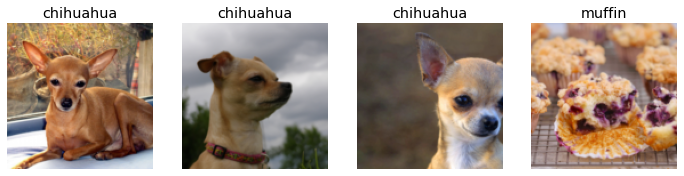

In [10]:
dls.valid.show_batch(max_n=4, nrows=1)

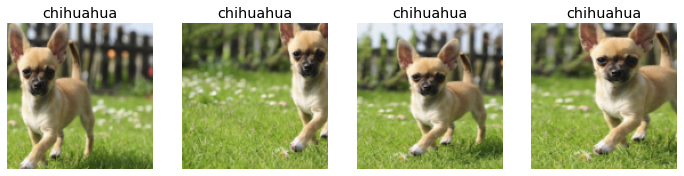

In [11]:
pics = pics.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = pics.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

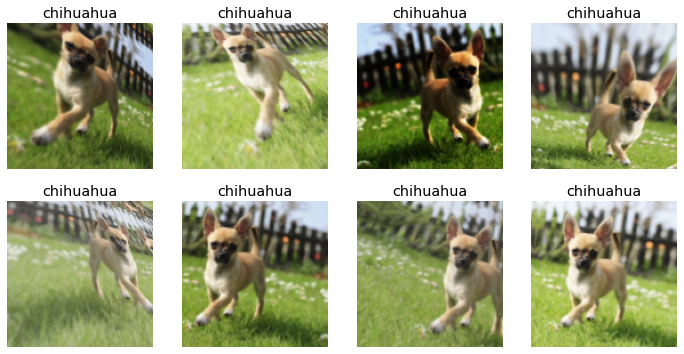

In [12]:
pics = pics.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = pics.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [13]:
pics = pics.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = pics.dataloaders(path)

In [14]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.867803,0.015801,0.000000,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.036917,0.004087,0.000000,00:07
1,0.019330,0.000299,0.000000,00:08
2,0.012625,0.000074,0.000000,00:08
3,0.009250,0.000054,0.000000,00:08


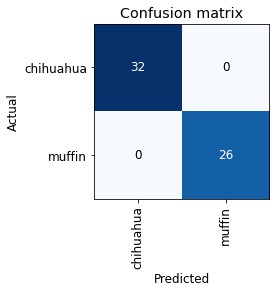

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

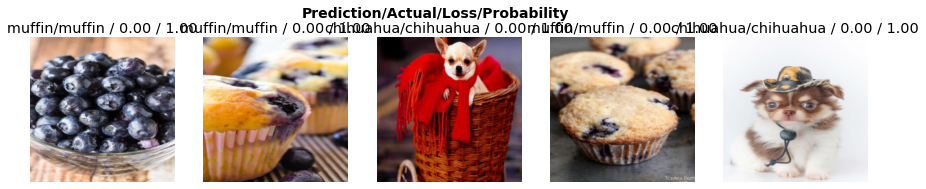

In [16]:
interp.plot_top_losses(5, nrows=1)

In [18]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [19]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [20]:
learn.export()

In [21]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [22]:
learn_inf = load_learner(path/'export.pkl')

In [23]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [45]:
img = PILImage.create(uploader.data[0])

In [46]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [47]:
learn_inf.predict(img)

('muffin', tensor(1), tensor([0.0031, 0.9969]))

In [48]:
learn_inf.dls.vocab

(#2) ['chihuahua','muffin']

In [49]:
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: muffin; Probability: 0.9969')

In [51]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [54]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [55]:
VBox([widgets.Label('Select your picture!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [57]:
!pip install voila

In [58]:
!jupyter serverextension enable voila —sys-prefix

Enabling: voila
- Writing config: /root/.jupyter
    - Validating...
      voila 0.2.3 OK
Enabling: —sys-prefix
- Writing config: /root/.jupyter
    - Validating...
Error loading server extension —sys-prefix
      X is —sys-prefix importable?
